In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#dataset location
df = pd.read_csv("data/answers_clean_complete.csv")
df = df.drop('Unnamed: 0', axis=1)
df = df.iloc[2:].reset_index(drop=True)

Less than 1 year       2
1 to 3 years          38
3 to 6 years         103
7 to 10 years         76
10 years and more    252
Name: experience, dtype: int64
0
Less than 1 year     0.004246
1 to 3 years         0.080679
3 to 6 years         0.218684
7 to 10 years        0.161359
10 years and more    0.535032
Name: experience, dtype: float64


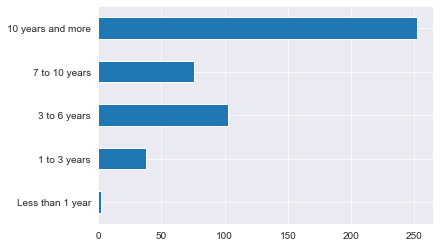

In [3]:
experience_series = df.experience.value_counts().reindex(index = ['Less than 1 year', '1 to 3 years', '3 to 6 years', '7 to 10 years', '10 years and more'])
experience_series.plot.barh()
print(experience_series)
print(df.experience.isna().sum())
print(experience_series / df.experience.shape[0])

Less than 1 year ago     25
1 to 3 years ago         83
3 to 6 years ago        123
7 to 10 years ago        83
10 years ago or more    157
Name: oss_experience, dtype: int64
0
Less than 1 year ago    0.053079
1 to 3 years ago        0.176221
3 to 6 years ago        0.261146
7 to 10 years ago       0.176221
10 years ago or more    0.333333
Name: oss_experience, dtype: float64


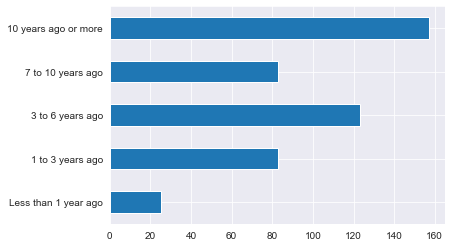

In [4]:
oss_experience_series = df.oss_experience.value_counts().reindex(index = ['Less than 1 year ago', '1 to 3 years ago', '3 to 6 years ago', '7 to 10 years ago', '10 years ago or more'])
oss_experience_series.plot.barh()
print(oss_experience_series)
print(df.oss_experience.isna().sum())
print(oss_experience_series / df.oss_experience.shape[0])

In [5]:
df.repo_name.isna().sum()

20

18 repositories mentioned 2 times.
20 respondents did not mention their repository.
415 repositories were mentioned once.

In [6]:
df.role.value_counts()

Maintainer / Integrator / Project (co-)owner / Tech lead (Please specify in the text box below)    283
Source code contributor                                                                            187
Name: role, dtype: int64

In [7]:
df.role.isna().sum()

1

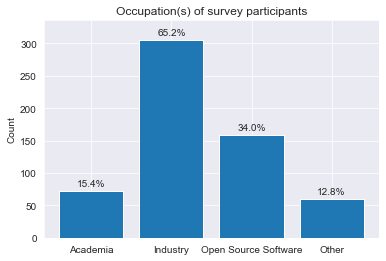

In [8]:
jobs = ['Academia', 'Industry', 'Open Source Software', 'Other']
counts = [df.job_academia.sum(), df.job_industry.sum(), df.job_oss.sum(), df.job_other.sum()]

fig, ax = plt.subplots()
bars = ax.bar(jobs, counts)

# Add percentage labels to each bar
for bar in bars:
    height = bar.get_height()
    percentage = f'{height/468*100:.1f}%'
    ax.annotate(percentage, xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points',
                ha='center', va='bottom')

# Adjust y-axis limits
ax.set_ylim(top=max(counts) * 1.1)

ax.set_ylabel('Count')
ax.set_title('Occupation(s) of survey participants')

fig.savefig('./figures/fig-participants-occupation.pdf', dpi=300, bbox_inches='tight')
plt.show()



In [9]:
df.job.isna().sum()

3

Occupation details:

In [10]:
print(df.job_academia.sum() * 100 / 468)
print(df.job_industry.sum() * 100 / 468)
print(df.job_oss.sum() * 100 / 468)
print(df.job_other.sum() * 100 / 468)

print(df.job_academia.sum())
print(df.job_industry.sum())
print(df.job_oss.sum())
print(df.job_other.sum())

15.384615384615385
65.17094017094017
33.97435897435897
12.820512820512821
72
305
159
60


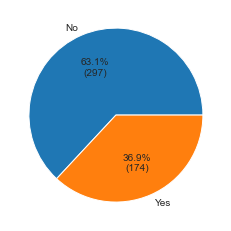

In [11]:
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return '{:.1f}%\n({v:d})'.format(pct, v=val)

    return my_format

s = df.is_daily_job.value_counts()
plt.pie(s,labels = s.index, autopct=autopct_format(s))
plt.show()

In [12]:
df.is_daily_job.isna().sum()

0